בתרגיל זה תתבקשו לבצע
ניבוי קצב לב במנוחה ❤️
- X1: גיל הנבדק.  
- X2: מספר שעות פעילות גופנית בשבוע.  
- Y: קצב הלב במנוחה (פעימות לדקה).
רעש: רמות סטרס, גורמים גנטיים.
* הנתונים הם נתוני דמה.

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# יצירת נתוני TRAIN
# קביעת seed כדי שהתוצאה תהיה שחזורית
tf.random.set_seed(42)

# יצירת משתנים X1 ו-X2 עם התפלגות נורמלית
X1 = tf.random.normal(shape=(35,), mean=45, stddev=2)
X2 = tf.random.normal(shape=(35,), mean=2, stddev=1)

# יצירת Y כצירוף לינארי של X1 ו-X2 + רעש
Y = (3 * X1 + 2 * X2 + tf.random.normal(shape=(35,), mean=0, stddev=3))/1.7

# הדפסת הדוגמאות הראשונות
print("X1:", X1[:5].numpy())
print("X2:", X2[:5].numpy())
print("Y:", Y[:5].numpy())

# יצירת טנסור נתונים משולב (לשימוש מאוחר יותר)
train_data = tf.stack([X1, X2, Y], axis=1)
print("Data shape:", train_data.shape)  # (35, 3)

X1: [45.654938 43.314747 45.638866 42.184895 40.22388 ]
X2: [2.0842247 1.1390963 2.378123  1.9948037 1.505468 ]
Y: [82.03293  76.83428  87.524666 74.015594 74.17594 ]
Data shape: (35, 3)


In [3]:
X_train = tf.stack([X1,X2], axis=1)
y_train = Y



In [4]:
X_train[:5]

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[45.654938 ,  2.0842247],
       [43.314747 ,  1.1390963],
       [45.638866 ,  2.378123 ],
       [42.184895 ,  1.9948037],
       [40.22388  ,  1.505468 ]], dtype=float32)>

In [19]:
# Build Model 🚀
model = tf.keras.Sequential ([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense (50,activation='relu'),
    tf.keras.layers.Dense (50,activation='relu'),
    tf.keras.layers.Dense(1,activation=None)
])


In [20]:
# Configure Model 🔧
model.compile(
    loss=tf.keras.losses.mse,
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [21]:
# Train Model 🎯
history = model.fit(X_train,y_train, epochs=100, verbose= 0)

In [13]:
# Use the original code to create some Test Data
# יצירת משתנים X1 ו-X2 עם התפלגות נורמלית
X1 = tf.random.normal(shape=(10,), mean=45, stddev=2)
X2 = tf.random.normal(shape=(10,), mean=2, stddev=1)

# יצירת Y כצירוף לינארי של X1 ו-X2 + רעש
Y = (3 * X1 + 2 * X2 + tf.random.normal(shape=(10,), mean=0, stddev=3))/1.7


test_data = tf.stack([X1, X2, Y], axis=1)
X_test = tf.stack([X1,X2], axis=1)
y_test = Y

In [22]:
# Make a prediction  🔮
predicted = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [ ]:
predicted

In [ ]:
tf.squeeze(predicted)

In [ ]:
y_test

In [25]:
# אם רוצים לראות השוואה
pred_tensor =tf.stack([tf.squeeze(predicted),y_test],axis =1)
pred_tensor

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[83.95759 , 84.14688 ],
       [79.88585 , 80.04006 ],
       [82.542564, 84.3569  ],
       [78.480156, 81.05967 ],
       [84.44772 , 83.858665],
       [76.76302 , 77.63567 ],
       [78.76433 , 82.87768 ],
       [80.3071  , 78.51491 ],
       [77.39642 , 73.72603 ],
       [86.39934 , 85.37679 ]], dtype=float32)>

In [17]:
import matplotlib.pyplot as plt

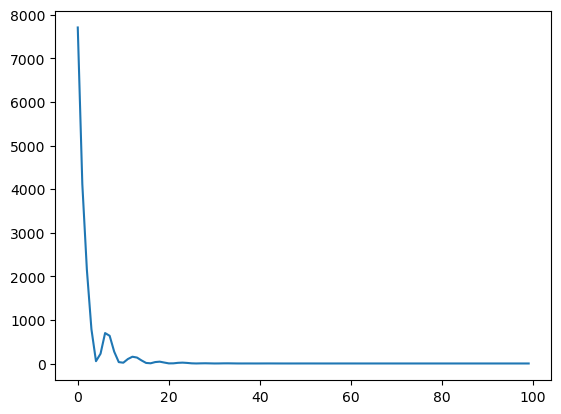

In [23]:
#make a plot of the loss
plt.plot(history.history['loss'])

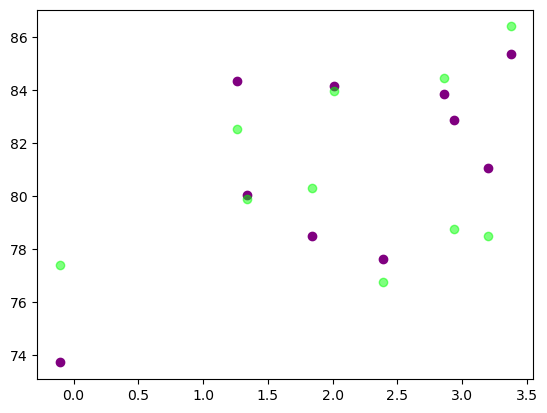

In [24]:
#make a plot of the predictions vs the targets. 
plt.scatter(X_test[:,1], y_test, color ="Purple")
plt.scatter(X_test[:,1], predicted, color = 'Lime', alpha =0.5)

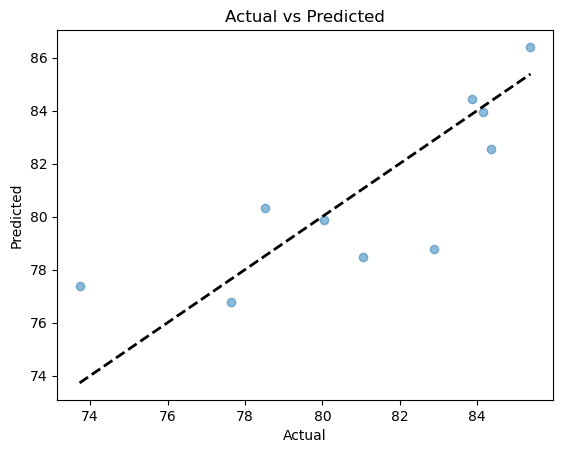

In [26]:
plt.scatter(y_test, predicted, alpha=0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.show()